In [1]:
# Import series of helper functions for the notebook (we've created/used these in previous notebooks)
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

In [2]:
import tensorflow as tf

In [5]:
import tensorflow_datasets as tfds

C:\Users\semen\.conda\envs\gpu_test_3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'booksum', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d', 'cs_restaurants', 'curated_breast_imaging_ddsm', 'cycle_gan', 'd4rl_adroit_door', 'd4rl_adroit_hammer', 'd4rl_adroit_pen', 'd4rl_adroit_relocate', 'd4rl_ant

In [6]:
(train_data, test_data), ds_info = tfds.load(name='food101',
                                            split=['train', 'validation'],
                                            shuffle_files=True,
                                            as_supervised=True,
                                            with_info=True)

In [6]:
ds_info

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_path='C:\\Users\\semen\\tensorflow_datasets\\food101\\2.0.0',
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_exa

In [7]:
ds_info.features["label"].names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

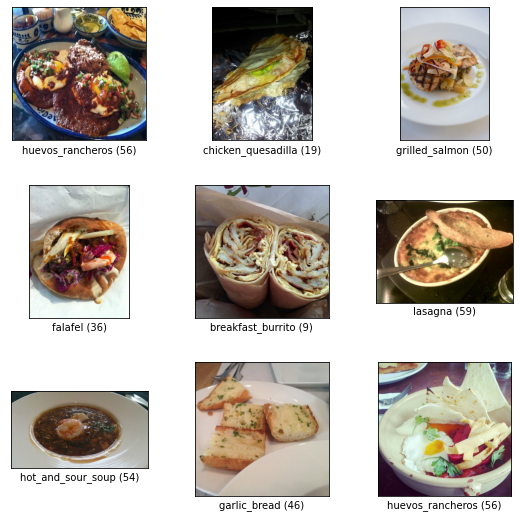

In [8]:
fig = tfds.show_examples(train_data, ds_info)

,image,label
0,,52 (gyoza)
1,,68 (onion_rings)
2,,84 (risotto)
3,,84 (risotto)
4,,99 (tuna_tartare)
5,,55 (hot_dog)
6,,91 (spaghetti_carbonara)
7,,29 (cup_cakes)
8,,40 (french_fries)
9,,65 (mussels)

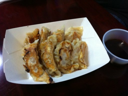
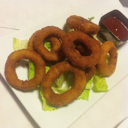
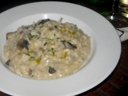
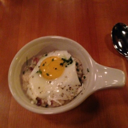
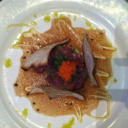
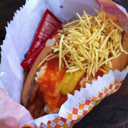
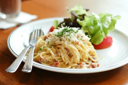
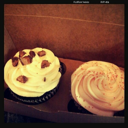
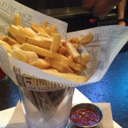
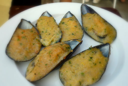

In [9]:
tfds.as_dataframe(train_data.take(10), ds_info)

In [10]:
!pip install Jinja2

In [11]:
train_one_sample = train_data.take(1)
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [12]:
class_names = ds_info.features["label"].names
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
        """)


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 23
        


In [13]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 93,  34,  40],
        [ 93,  34,  40],
        [ 94,  35,  41],
        ...,
        [ 52,  15,  23],
        [ 52,  15,  23],
        [ 52,  15,  23]],

       [[ 93,  34,  40],
        [ 93,  34,  40],
        [ 94,  35,  41],
        ...,
        [ 52,  15,  23],
        [ 52,  15,  23],
        [ 52,  15,  23]],

       [[ 93,  34,  40],
        [ 93,  34,  40],
        [ 94,  35,  41],
        ...,
        [ 54,  14,  23],
        [ 52,  15,  23],
        [ 52,  15,  23]],

       ...,

       [[108,  31,  49],
        [106,  29,  47],
        [105,  28,  46],
        ...,
        [121,  38,  56],
        [122,  39,  59],
        [123,  40,  60]],

       [[107,  30,  48],
        [107,  30,  48],
        [107,  30,  48],
        ...,
        [121,  38,  58],
        [123,  40,  60],
        [123,  40,  60]],

       [[106,  29,  47],
        [108,  31,  49],
        [109,  32,  50],
        ...,
        [123,  40,  6

In [14]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=9>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

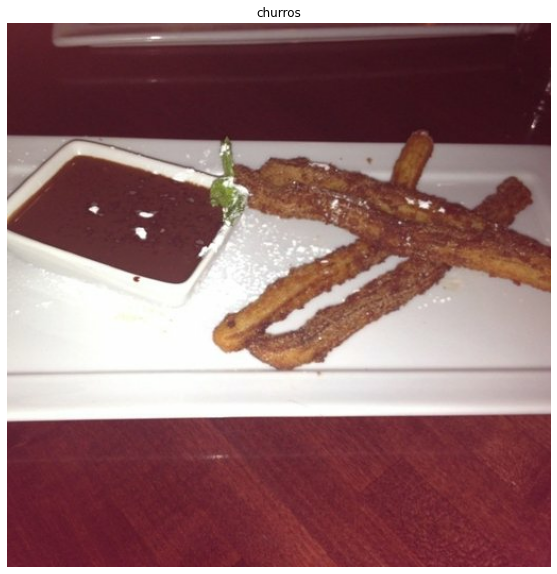

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

In [8]:
def preprocess_img(image, label, img_shape=224):
    """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to
    [img_shape, img_shape, color_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape])
    return tf.cast(image, tf.float32), label

In [17]:
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")


Image before preprocessing:
 [[[93 34 40]
  [93 34 40]
  [94 35 41]
  ...
  [52 15 23]
  [52 15 23]
  [52 15 23]]

 [[93 34 40]
  [93 34 40]
  [94 35 41]
  ...
  [52 15 23]
  [52 15 23]
  [52 15 23]]]...,
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[93.       34.       40.      ]
  [94.       35.       41.      ]
  [95.       36.       42.      ]
  ...
  [55.       15.       24.      ]
  [52.       15.       23.      ]
  [52.       15.       23.      ]]

 [[93.92857  34.928574 40.928574]
  [93.07143  34.071426 40.071426]
  [94.       35.       41.      ]
  ...
  [55.       15.       24.      ]
  [54.       14.       23.      ]
  [52.       15.       23.      ]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


In [18]:
# Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")


Image before preprocessing:
 [[[93 34 40]
  [93 34 40]
  [94 35 41]
  ...
  [52 15 23]
  [52 15 23]
  [52 15 23]]

 [[93 34 40]
  [93 34 40]
  [94 35 41]
  ...
  [52 15 23]
  [52 15 23]
  [52 15 23]]]...,
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[93.       34.       40.      ]
  [94.       35.       41.      ]
  [95.       36.       42.      ]
  ...
  [55.       15.       24.      ]
  [52.       15.       23.      ]
  [52.       15.       23.      ]]

 [[93.92857  34.928574 40.928574]
  [93.07143  34.071426 40.071426]
  [94.       35.       41.      ]
  ...
  [55.       15.       24.      ]
  [54.       14.       23.      ]
  [52.       15.       23.      ]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


In [9]:
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.shuffle(1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [20]:
from helper_functions import create_tensorboard_callback

check_point_path = 'model_checkpoints_food_vision/cp.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(check_point_path,
                                                 )

In [21]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision 

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3060 Laptop GPU, compute capability 8.6


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3060 Laptop GPU, compute capability 8.6


In [22]:
from tensorflow.keras import layers

input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = layers.Input(shape=input_shape, name='input_layer', dtype=tf.float16)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="GlobalAveragePooling2D")(x)
outputs = layers.Dense(len(class_names), activation='softmax', dtype=tf.float32, name='output_layer')(x)
model=tf.keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [23]:
# Check out our model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GlobalAveragePooling2D (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [24]:
for each_layer in model.layers:
    print(each_layer.name, each_layer.dtype)

input_layer float16
efficientnetb0 float32
GlobalAveragePooling2D float32
output_layer float32


In [25]:
for each_layer in base_model.layers:
    print(each_layer.name, each_layer.dtype, each_layer.dtype_policy)

input_1 float32 <Policy "float32">
rescaling float32 <Policy "mixed_float16">
normalization float32 <Policy "mixed_float16">
stem_conv_pad float32 <Policy "mixed_float16">
stem_conv float32 <Policy "mixed_float16">
stem_bn float32 <Policy "mixed_float16">
stem_activation float32 <Policy "mixed_float16">
block1a_dwconv float32 <Policy "mixed_float16">
block1a_bn float32 <Policy "mixed_float16">
block1a_activation float32 <Policy "mixed_float16">
block1a_se_squeeze float32 <Policy "mixed_float16">
block1a_se_reshape float32 <Policy "mixed_float16">
block1a_se_reduce float32 <Policy "mixed_float16">
block1a_se_expand float32 <Policy "mixed_float16">
block1a_se_excite float32 <Policy "mixed_float16">
block1a_project_conv float32 <Policy "mixed_float16">
block1a_project_bn float32 <Policy "mixed_float16">
block2a_expand_conv float32 <Policy "mixed_float16">
block2a_expand_bn float32 <Policy "mixed_float16">
block2a_expand_activation float32 <Policy "mixed_float16">
block2a_dwconv_pad float3

In [26]:
# Fit the model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data, 
                                                     epochs=5,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs", 
                                                                    "efficientnetb0_101_classes_all_data_feature_extract"),
                                                     model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20220406-212038
Epoch 1/5
2368/2368 [==============================] - ETA: 0s - loss: 1.8228 - accuracy: 0.5572INFO:tensorflow:Assets written to: model_checkpoints_food_vision\cp.ckpt\assets


INFO:tensorflow:Assets written to: model_checkpoints_food_vision\cp.ckpt\assets


2368/2368 [==============================] - 230s 93ms/step - loss: 1.8228 - accuracy: 0.5572 - val_loss: 1.2256 - val_accuracy: 0.6788
Epoch 2/5
2367/2368 [============================>.] - ETA: 0s - loss: 1.2945 - accuracy: 0.6653INFO:tensorflow:Assets written to: model_checkpoints_food_vision\cp.ckpt\assets


INFO:tensorflow:Assets written to: model_checkpoints_food_vision\cp.ckpt\assets


2368/2368 [==============================] - 223s 94ms/step - loss: 1.2946 - accuracy: 0.6653 - val_loss: 1.1354 - val_accuracy: 0.6965
Epoch 3/5
2367/2368 [============================>.] - ETA: 0s - loss: 1.1432 - accuracy: 0.7020INFO:tensorflow:Assets written to: model_checkpoints_food_vision\cp.ckpt\assets


INFO:tensorflow:Assets written to: model_checkpoints_food_vision\cp.ckpt\assets


2368/2368 [==============================] - 219s 92ms/step - loss: 1.1431 - accuracy: 0.7020 - val_loss: 1.1105 - val_accuracy: 0.7031
Epoch 4/5
2367/2368 [============================>.] - ETA: 0s - loss: 1.0457 - accuracy: 0.7261INFO:tensorflow:Assets written to: model_checkpoints_food_vision\cp.ckpt\assets


INFO:tensorflow:Assets written to: model_checkpoints_food_vision\cp.ckpt\assets


2368/2368 [==============================] - 223s 94ms/step - loss: 1.0457 - accuracy: 0.7261 - val_loss: 1.0722 - val_accuracy: 0.7142
Epoch 5/5
2367/2368 [============================>.] - ETA: 0s - loss: 0.9723 - accuracy: 0.7445INFO:tensorflow:Assets written to: model_checkpoints_food_vision\cp.ckpt\assets


INFO:tensorflow:Assets written to: model_checkpoints_food_vision\cp.ckpt\assets


2368/2368 [==============================] - 222s 93ms/step - loss: 0.9724 - accuracy: 0.7445 - val_loss: 1.0607 - val_accuracy: 0.7071


In [28]:
# Save model
model.save("model_checkpoints_food_vision_2")

INFO:tensorflow:Assets written to: model_checkpoints_food_vision_2\assets


INFO:tensorflow:Assets written to: model_checkpoints_food_vision_2\assets


In [3]:
import tensorflow as tf

In [10]:
model_restore = tf.keras.models.load_model("model_checkpoints_food_vision_2")
model_restore.evaluate(test_data)

790/790 [==============================] - 47s 44ms/step - loss: 1.0712 - accuracy: 0.7077


[1.071183443069458, 0.7077227830886841]

In [27]:
for layer in model_restore.layers:
    layer.trainable=True
    print(layer.name, layer.trainable)

input_layer True
efficientnetb0 True
GlobalAveragePooling2D True
output_layer True


In [11]:
model_restore.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GlobalAveragePooling2D (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [28]:
for i, each_layer in enumerate(model_restore.layers[1].layers[:-20]):
    each_layer.trainable = False
    print(i, each_layer.name, each_layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [29]:
for i, each_layer in enumerate(model_restore.layers[1].layers[:]):
    print(i, each_layer.name, each_layer.trainable, each_layer.dtype, each_layer.dtype_policy)

0 input_1 False float32 <Policy "float32">
1 rescaling False float32 <Policy "mixed_float16">
2 normalization False float32 <Policy "mixed_float16">
3 stem_conv_pad False float32 <Policy "mixed_float16">
4 stem_conv False float32 <Policy "mixed_float16">
5 stem_bn False float32 <Policy "mixed_float16">
6 stem_activation False float32 <Policy "mixed_float16">
7 block1a_dwconv False float32 <Policy "mixed_float16">
8 block1a_bn False float32 <Policy "mixed_float16">
9 block1a_activation False float32 <Policy "mixed_float16">
10 block1a_se_squeeze False float32 <Policy "mixed_float16">
11 block1a_se_reshape False float32 <Policy "mixed_float16">
12 block1a_se_reduce False float32 <Policy "mixed_float16">
13 block1a_se_expand False float32 <Policy "mixed_float16">
14 block1a_se_excite False float32 <Policy "mixed_float16">
15 block1a_project_conv False float32 <Policy "mixed_float16">
16 block1a_project_bn False float32 <Policy "mixed_float16">
17 block2a_expand_conv False float32 <Policy 

In [30]:
early_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [31]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='food_vision_model_checkpoints',
                                                        monitor='val_loss',
                                                        save_best_only=True,
                                                    save_weights_only=True)

In [32]:
# Recompile model with lower learning rate
model_restore.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])

In [33]:
fine_tune_eapochs = 105
food_vision_history = model_restore.fit(train_data, 
                                       epochs=fine_tune_eapochs,
                                       steps_per_epoch=len(train_data),
                                       initial_epoch=5,
                                       validation_data=test_data,
                                       validation_steps=int(0.15 * len(test_data)),
                                       callbacks=[early_callback, checkpoint_callback])

Epoch 6/105
2368/2368 [==============================] - 148s 60ms/step - loss: 0.4116 - accuracy: 0.8902 - val_loss: 1.1192 - val_accuracy: 0.7288
Epoch 7/105
2368/2368 [==============================] - 129s 54ms/step - loss: 0.2867 - accuracy: 0.9253 - val_loss: 1.2023 - val_accuracy: 0.7280
Epoch 8/105
2368/2368 [==============================] - 141s 59ms/step - loss: 0.1954 - accuracy: 0.9511 - val_loss: 1.2836 - val_accuracy: 0.7246
Epoch 9/105
2368/2368 [==============================] - 147s 62ms/step - loss: 0.1274 - accuracy: 0.9701 - val_loss: 1.4197 - val_accuracy: 0.7150


In [20]:
for layer in model_restore.layers:
    print(layer.name, layer.trainable)

input_layer True
efficientnetb0 True
GlobalAveragePooling2D True
output_layer True


In [34]:
# Download the saved model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip 

--2022-04-07 13:26:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.212.176, 142.250.184.240, 142.250.186.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.212.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16976857 (16M) [application/zip]
Saving to: '07_efficientnetb0_feature_extract_model_mixed_precision.zip'

     0K .......... .......... .......... .......... ..........  0%  658K 25s
    50K .......... .......... .......... .......... ..........  0%  754K 23s
   100K .......... .......... .......... .......... ..........  0% 1.47M 19s
   150K .......... .......... .......... .......... ..........  1% 2.51M 16s
   200K .......... .......... .......... .......... ..........  1% 1.78M 15s
   250K .......... .......... .......... .......... ..........  1% 4.54M 13s
   300K .......... .....

In [36]:
# Import series of helper functions for the notebook (we've created/used these in previous notebooks)
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [37]:
unzip_data("07_efficientnetb0_feature_extract_model_mixed_precision.zip ")

In [38]:
loaded_gs_model = tf.keras.models.load_model("07_efficientnetb0_feature_extract_model_mixed_precision")

In [39]:
loaded_gs_model.evaluate(test_data)

790/790 [==============================] - 39s 47ms/step - loss: 1.0881 - accuracy: 0.7064


[1.0880998373031616, 0.7064158320426941]

In [59]:
for layer in loaded_gs_model.layers:
    layer.trainable=True
    print(layer.name, layer.trainable)

input_layer True
efficientnetb0 True
pooling_layer True
dense True
softmax_float32 True


In [60]:
loaded_gs_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 4,136,929
Non-train

In [42]:
for i, each_layer in enumerate(loaded_gs_model.layers[1].layers[:-20]):
    each_layer.trainable = False
    print(i, each_layer.name, each_layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [61]:
for i, each_layer in enumerate(loaded_gs_model.layers[1].layers[:]):
    print(i, each_layer.name, each_layer.trainable, each_layer.dtype, each_layer.dtype_policy)

0 input_1 True float32 <Policy "float32">
1 rescaling True float32 <Policy "mixed_float16">
2 normalization True float32 <Policy "float32">
3 stem_conv_pad True float32 <Policy "mixed_float16">
4 stem_conv True float32 <Policy "mixed_float16">
5 stem_bn True float32 <Policy "mixed_float16">
6 stem_activation True float32 <Policy "mixed_float16">
7 block1a_dwconv True float32 <Policy "mixed_float16">
8 block1a_bn True float32 <Policy "mixed_float16">
9 block1a_activation True float32 <Policy "mixed_float16">
10 block1a_se_squeeze True float32 <Policy "mixed_float16">
11 block1a_se_reshape True float32 <Policy "mixed_float16">
12 block1a_se_reduce True float32 <Policy "mixed_float16">
13 block1a_se_expand True float32 <Policy "mixed_float16">
14 block1a_se_excite True float32 <Policy "mixed_float16">
15 block1a_project_conv True float32 <Policy "mixed_float16">
16 block1a_project_bn True float32 <Policy "mixed_float16">
17 block2a_expand_conv True float32 <Policy "mixed_float16">
18 bloc

In [62]:
for layer in loaded_gs_model.layers:
    print(layer.name, layer.trainable)

input_layer True
efficientnetb0 True
pooling_layer True
dense True
softmax_float32 True


In [63]:
loaded_gs_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 4,136,929
Non-train

In [64]:
early_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='food_vision_model_checkpoints',
                                                        monitor='val_loss',
                                                        save_best_only=True,
                                                    save_weights_only=True)
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

In [65]:
# Recompile model with lower learning rate
loaded_gs_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than default
              metrics=['accuracy'])

In [67]:
fine_tune_eapochs = 25
food_vision_history = loaded_gs_model.fit(train_data, 
                                       epochs=fine_tune_eapochs,
                                       steps_per_epoch=len(train_data),
                                       initial_epoch=4,
                                       validation_data=test_data,
                                       validation_steps=int(0.15 * len(test_data)),
                                       callbacks=[early_callback, checkpoint_callback, reduce_lr])

Epoch 5/25
2368/2368 [==============================] - 356s 147ms/step - loss: 0.0918 - accuracy: 0.9704 - val_loss: 1.5044 - val_accuracy: 0.7511 - lr: 1.0000e-04
Epoch 6/25
2368/2368 [==============================] - 347s 146ms/step - loss: 0.0720 - accuracy: 0.9763 - val_loss: 1.5412 - val_accuracy: 0.7431 - lr: 1.0000e-04
Epoch 7/25
2368/2368 [==============================] - 355s 150ms/step - loss: 0.0638 - accuracy: 0.9792 - val_loss: 1.4494 - val_accuracy: 0.7458 - lr: 1.0000e-04
Epoch 8/25
2368/2368 [==============================] - 388s 164ms/step - loss: 0.0528 - accuracy: 0.9829 - val_loss: 1.3765 - val_accuracy: 0.7542 - lr: 1.0000e-04
Epoch 9/25
2368/2368 [==============================] - 382s 161ms/step - loss: 0.0487 - accuracy: 0.9843 - val_loss: 1.3386 - val_accuracy: 0.7677 - lr: 1.0000e-04
Epoch 10/25
2368/2368 [==============================] - 356s 150ms/step - loss: 0.0463 - accuracy: 0.9847 - val_loss: 1.4814 - val_accuracy: 0.7582 - lr: 1.0000e-04
Epoch 11/